### Revisión de la integridad de los datos Sector I

Particularmente en este caso, cuando se realizó el proyecto real, participé desde el principio en la recopilación y carga de los datos. Por lo tanto, no había errores visibles como datos faltantes o incorrectos en tipo.

Cabe destacar que la naturaleza demográfica del sector es netamente fabril, con vías anchas de acceso rápido para vehículos pesados, gran tránsito vehicular y numerosas personas ajenas a la zona que no pueden ser identificadas.

-----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'delitos_csv/delitos_zona_i_ubicacion.csv'
df = pd.read_csv(file_path, delimiter=',')

print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
      nombre  robo a mano armada  robo de vehiculos  robo piraña  \
0  denuncia1                   0                  0            0   
1  denuncia2                   0                  0            0   
2  denuncia3                   0                  0            0   
3  denuncia4                   0                  0            0   
4  denuncia5                   0                  0            0   

   lesiones leves  robo  lesiones graves  hurto  vandalismo       fecha  \
0               0     1                0      1           1  29/05/2017   
1               0     0                0      0           0  24/05/2011   
2               0     0                0      1           1  17/05/2017   
3               0     2                0      0           2  10/08/2018   
4               0     2                0      1           2  28/11/2014   

     latitud   longitud  
0 -31.433011 -64.251693  
1 -31.439952 -64.250898  
2 -31.442822 -64.251414  
3 -31.

In [2]:
nan_null_conteo = df.isnull().sum()
print("Conteo de valores NaN o null por columna:")
print(nan_null_conteo)

columnas_todo_cero = [col for col in df.columns if (df[col] == 0).all()]
print("\nColumnas con todos los valores en 0:")
print(columnas_todo_cero)

Conteo de valores NaN o null por columna:
nombre                0
robo a mano armada    0
robo de vehiculos     0
robo piraña           0
lesiones leves        0
robo                  0
lesiones graves       0
hurto                 0
vandalismo            0
fecha                 0
latitud               0
longitud              0
dtype: int64

Columnas con todos los valores en 0:
['robo a mano armada', 'robo de vehiculos', 'robo piraña', 'lesiones leves', 'lesiones graves']


-----------------------------------------------------------------------------------------------------------------------

En este punto, *SI SE QUISIERA REVISAR LOS DATOS REALES* (los utilizados aquí están modificados por razones legales y a modo de ejemplo que replican la problemática), es importante evaluar si hay una totalidad de valores "0". Si nos referimos al sistema de carga de datos delictuales de algunas provincias argentinas, esto implicaría que erramos al consultar la fiscalía, UJ o el sistema policial de almacenamiento de datos.

-----------------------------------------------------------------------------------------------------------------------

In [3]:
columnas_a_excluir = ['nombre', 'fecha', 'latitud', 'longitud']
columnas_a_considerar = [col for col in df.columns if col not in columnas_a_excluir]

columnas_con_datos_no_cero = [col for col in columnas_a_considerar if (df[col] != 0).any()]

df_con_datos_no_cero = df[columnas_con_datos_no_cero]

estadisticas_descriptivas = df_con_datos_no_cero.describe(include='all')

print("\nEstadísticas descriptivas de las columnas con valores distintos de cero:")
print(estadisticas_descriptivas)


Estadísticas descriptivas de las columnas con valores distintos de cero:
            robo      hurto  vandalismo
count  50.000000  50.000000   50.000000
mean    0.980000   0.780000    0.960000
std     0.820403   0.789988    0.781417
min     0.000000   0.000000    0.000000
25%     0.000000   0.000000    0.000000
50%     1.000000   1.000000    1.000000
75%     2.000000   1.000000    2.000000
max     2.000000   2.000000    2.000000


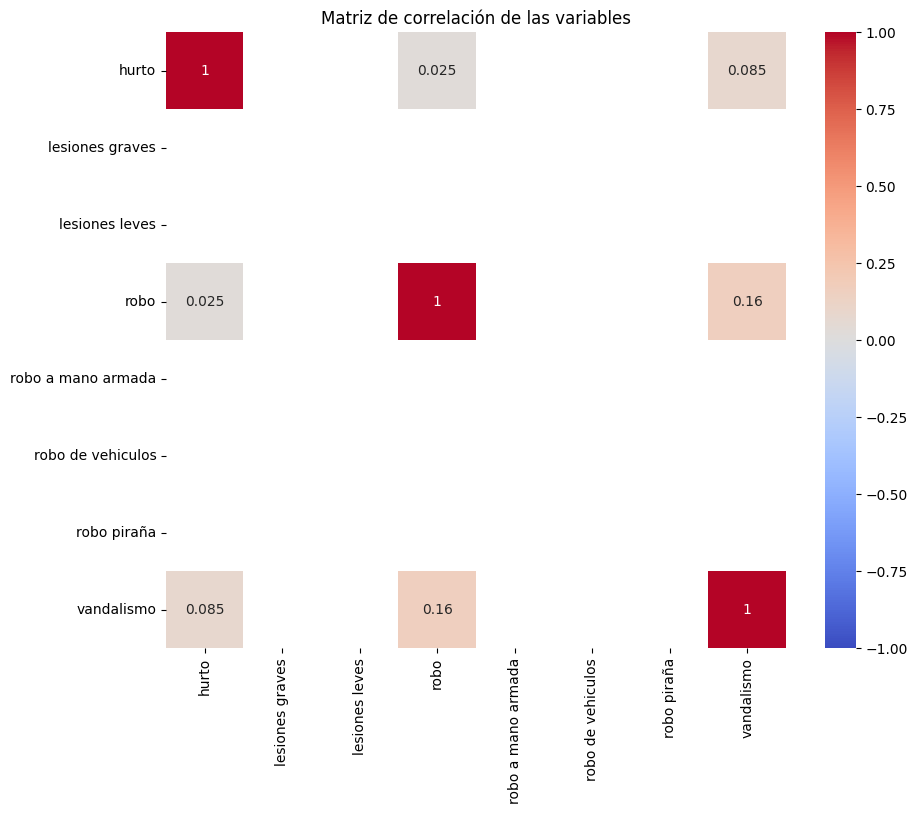

In [4]:
columnas_de_interes = df.columns.difference(['nombre', 'fecha', 'latitud', 'longitud'])
df_filtrado = df[columnas_de_interes]

matriz_de_correlacion = df_filtrado.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación de las variables')
plt.show()


-----------------------------------------------------------------------------------------------------------------------

### Aclaración:
En el contexto de una investigación es importante investigar la *CORRELACIÓN* siempre, esto permite, en muchos casos, descubrir nuevas prácticas delictuales. Aprovechando lo que ocurría en este sector, esa relación inversamente proporcional entre robo - vandalismo o hurto - vandalismo es producto de que el vandalismo es utilizado para evaluar las medidas de seguridad de las empresas, así como la respuesta de los sistemas de emergencia (policía, bomberos, etc.).

En este sistema de recolección de información (interno de la institución policial) cada "denuncia" no implica en sí que ocurrieron todos los hechos delictivos mencionados. En realidad, en esa entrevista la persona señaló todos los hechos que sufrió en ese espacio geográfico y/o temporal. Si bien parece que la calidad del dato no es apta para una investigación penal propia, es importante para comprender la actividad delictual de la zona.

-----------------------------------------------------------------------------------------------------------------------

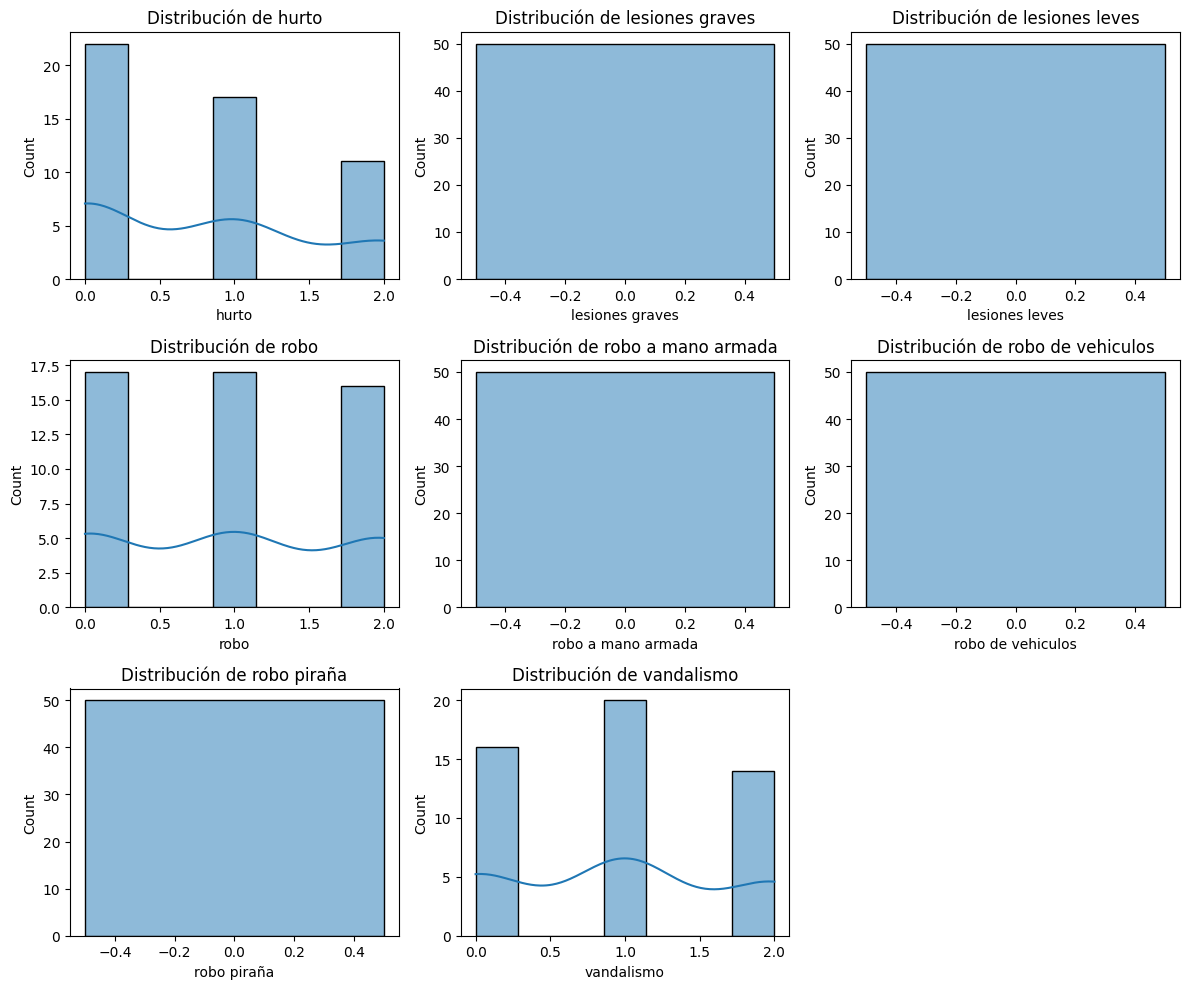

In [5]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columnas_de_interes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------------------------------------------------

Es difícil de percibir a primera instancia. Por eso, tanto las fechas (al menos una generalidad) como cruzar las diferentes fuentes de datos (Fiscalía, 911, entrevistas) son elementos muy importantes. A primera vista, no se observan los hechos de vandalismo en ocurridos 01 vez, se daban en seguidilla para así testear más objetivos en una sola noche. La reiteración del vandalismo implica que el objetivo es de calidad. Sin embargo, no se encontró una debilidad aprovechable en el primer testeo.

-----------------------------------------------------------------------------------------------------------------------

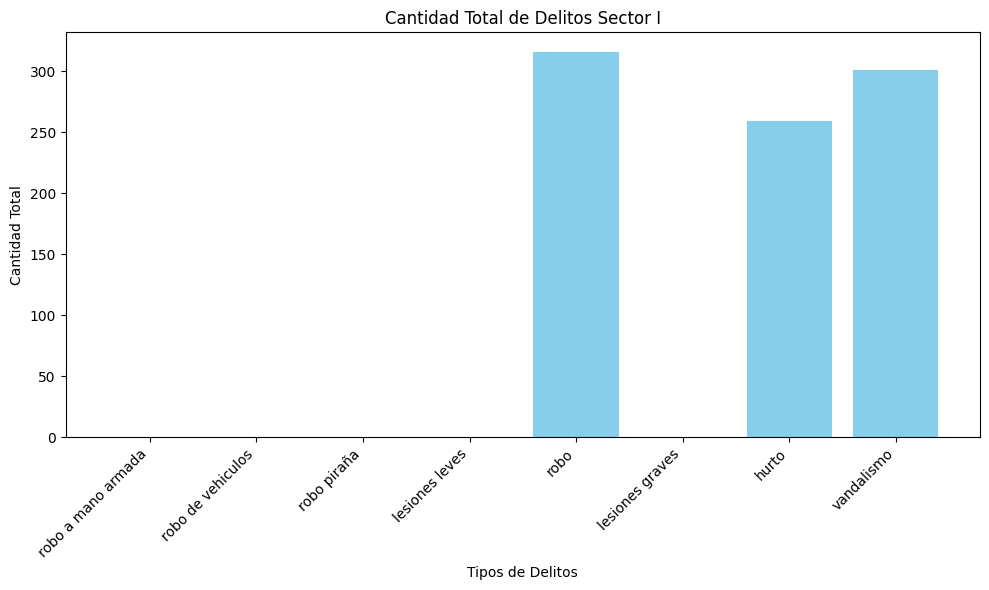

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("delitos_csv/delitos_zona_i.csv")


sumas_delitos = df.iloc[:, 1:-1].sum()


nombres_delitos = df.columns[1:-1]


plt.figure(figsize=(10, 6))
plt.bar(nombres_delitos, sumas_delitos, color="skyblue")
plt.xlabel("Tipos de Delitos")
plt.ylabel("Cantidad Total")
plt.title("Cantidad Total de Delitos Sector I")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()

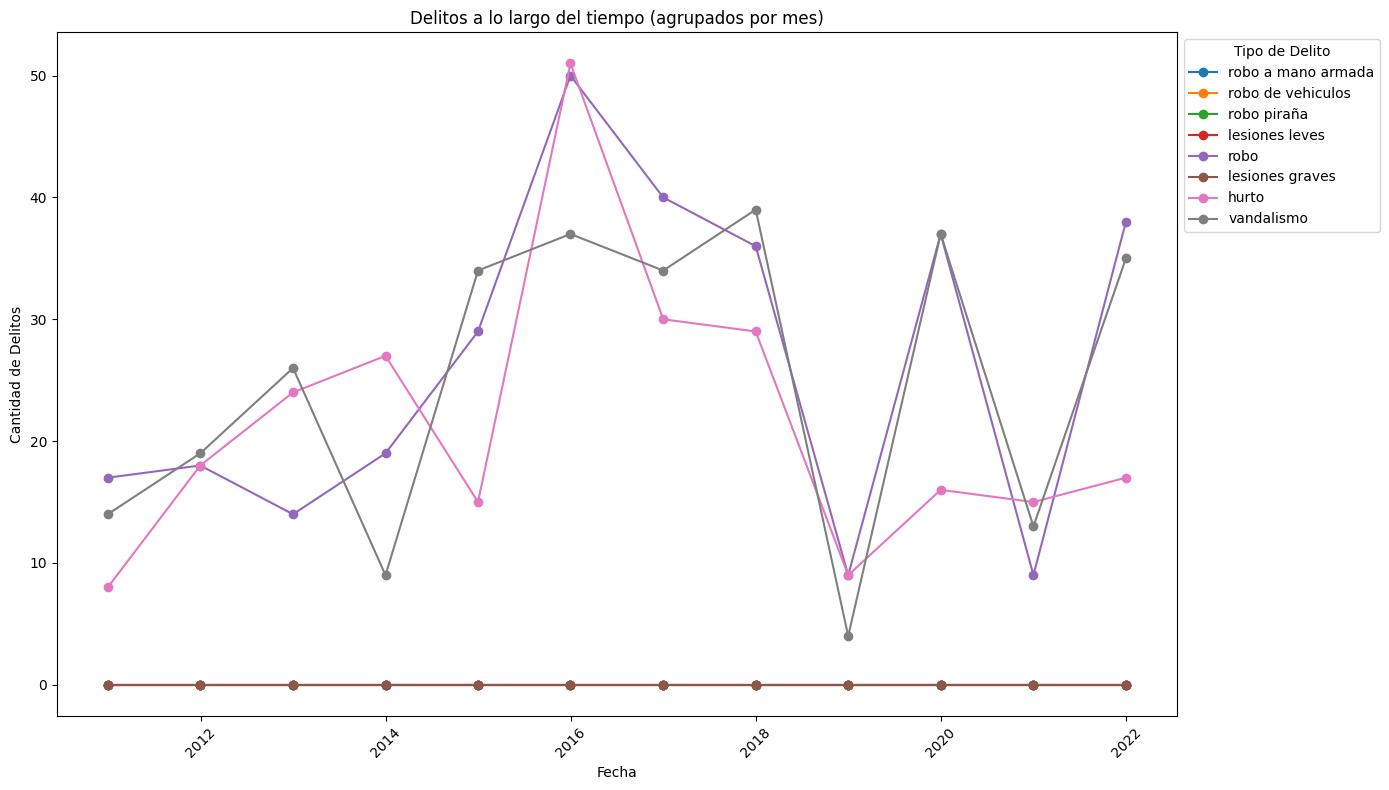

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('delitos_csv/delitos_zona_i.csv')

df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

df = df.drop(columns=['name'])

delitos_por_mes = df.groupby(pd.Grouper(key='fecha', freq='Y')).sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

for columna in delitos_por_mes.columns[1:]:
    ax.plot(delitos_por_mes['fecha'], delitos_por_mes[columna], marker='o', label=columna)

ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de Delitos')
ax.set_title('Delitos a lo largo del tiempo (agrupados por mes)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Tipo de Delito')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

-----------------------------------------------------------------------------------------------------------------------

Como observamos, los hechos de vandalismo son, aunque una problemática real, un problema menor en comparación, pero esto se da porque son un medio para un fin, por eso se dan en menor cantidad. De esto se desprenden estrategias reactivas que demostraron una eficiencia real en el campo operativo y, como por razones que no son relevantes, la interrupción de la aplicación de estas dispara nuevamente el delito en la zona. Esto revela que la relación costo-beneficio a nivel delictual hace de este sector algo muy atractivo.

-----------------------------------------------------------------------------------------------------------------------